# Media Company 

Importing modules

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
media = pd.read_csv("mediacompany.csv")
media = media.drop("Unnamed: 7",axis=1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [27]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [28]:
media["Date"] = pd.to_datetime(media["Date"])
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [29]:
from datetime import date

d0 = date(2017, 2, 28)
delta = []
for i in range(80):
    delta.append( media.Date[i].date() - d0)

media["Day"] = delta
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [30]:
media["Day"] = media["Day"].astype(str)
media["Day"] = media["Day"].map(lambda x : x[0:2])
media["Day"] = media["Day"].astype(int)

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


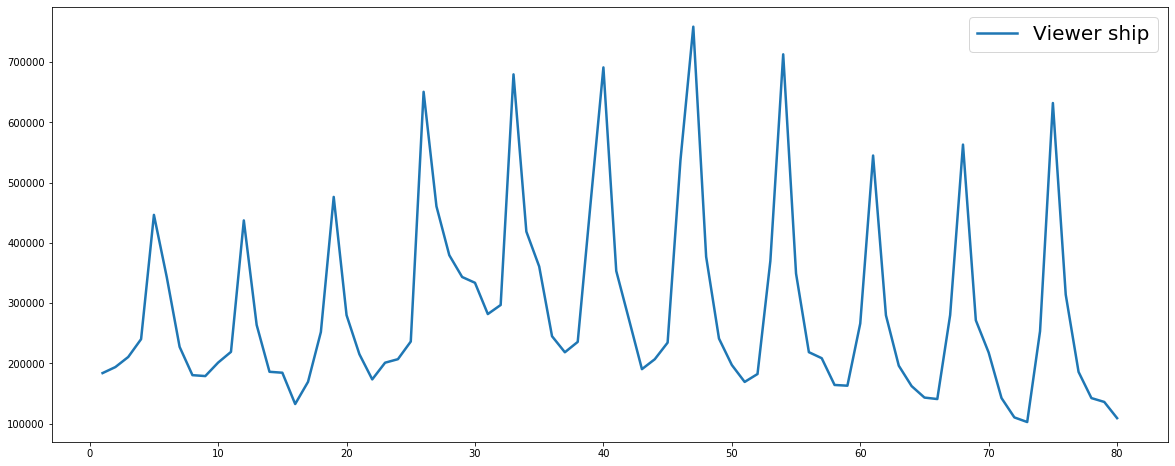

In [31]:
plt.figure(figsize=(20,8))
plt.plot(media["Day"], media["Views_show"], linewidth=2.5,label="Viewer ship")
plt.legend(fontsize=20)

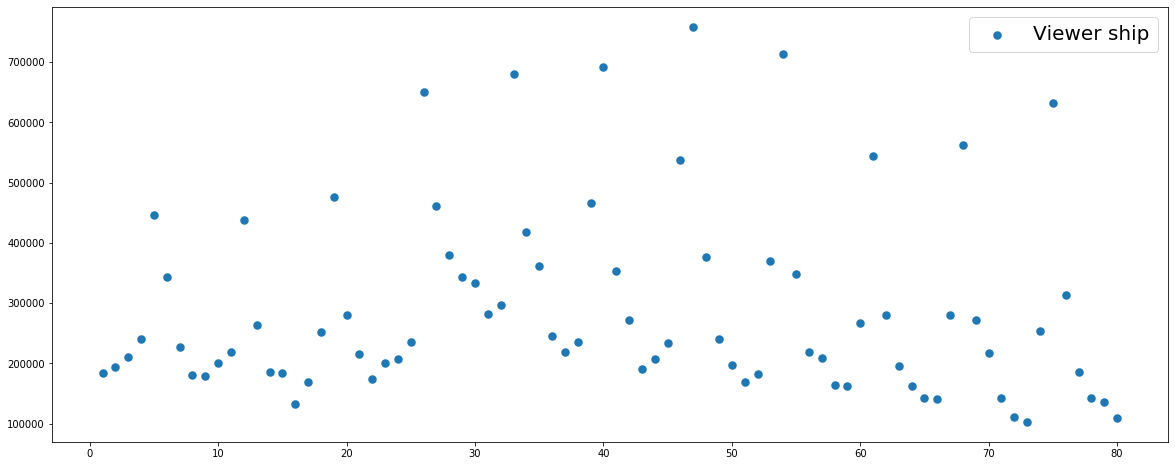

In [32]:
plt.figure(figsize=(20,8))
plt.scatter(media["Day"], media["Views_show"], linewidth=2.5,label="Viewer ship")
plt.legend(fontsize=20)

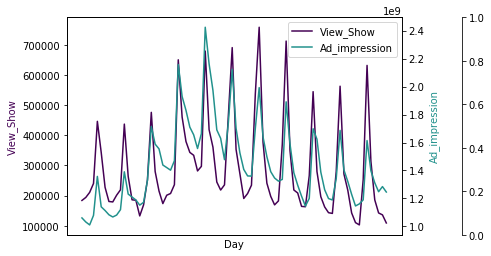

In [33]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.Day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.Day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

par2.spines['right'].set_position(('outward', 60))      
                 
par2.xaxis.set_ticks([])


host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [34]:
media["weekday"] = (media["Day"]+3)%7
media.weekday.replace(0,7, inplace=True)
media["weekday"] = media["weekday"].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [35]:
X = media[["Visitors","weekday"]]

y = media["Views_show"]

In [36]:
lm = LinearRegression()

lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print("Slope: ",lm.coef_)
print("Interscept: ",lm.intercept_)

Slope:  [ 2.78681183e-01 -3.59083501e+04]
Interscept:  -38615.11278656911


In [38]:
X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           8.01e-12
Time:                        11:20:17   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [39]:
def cond(i):
    if i%7 == 5:
        return 1
    elif i%7 == 4:
        return 1
    else:
        return 0
    return i
media["weekend"] = [cond(i) for i in media["Day"]]

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [40]:
X = media[["Visitors", "weekend"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_2 = sm.OLS(y, X).fit()

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.51e-12
Time:                        11:20:17   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [41]:
X = media[["Visitors", "weekend", "Character_A"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_3 = sm.OLS(y, X).fit()

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.53e-14
Time:                        11:20:17   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [42]:
media["Lag_views"] = np.roll(media["Views_show"], 1)     # shift every value by 1
media.Lag_views.replace(108961, 0 ,inplace = True)       # last value is shifted to first so making it zero

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [49]:
X = media[["Visitors", "Character_A", "Lag_views", "weekend"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_4 = sm.OLS(y, X).fit()

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           3.16e-21
Time:                        11:30:52   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

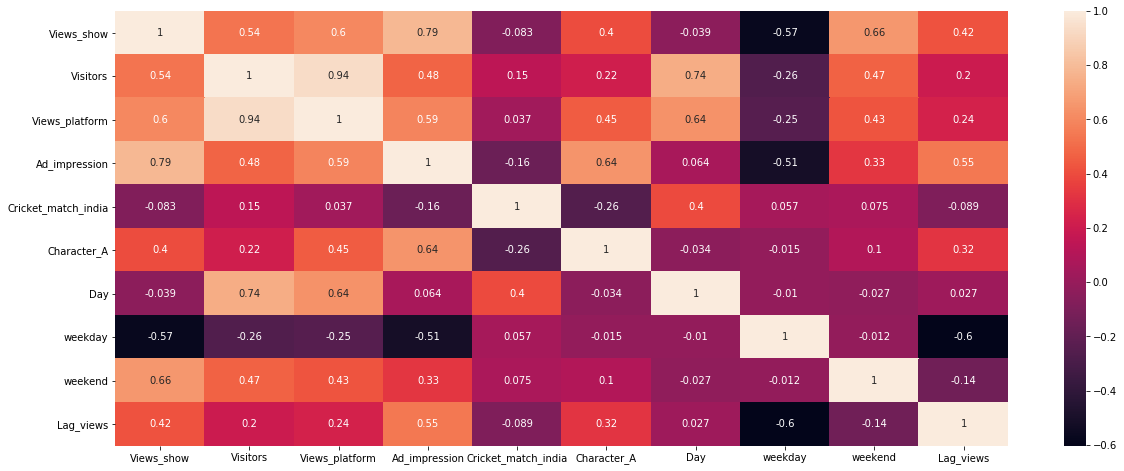

In [46]:
plt.figure(figsize=(20,8))
sns.heatmap(media.corr(), annot= True)

In [50]:
X = media[["Character_A", "weekend", "Views_platform"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_5 = sm.OLS(y, X).fit()

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           3.59e-15
Time:                        11:30:59   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [51]:
X = media[["Character_A", "weekend", "Visitors"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_6 = sm.OLS(y, X).fit()

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.53e-14
Time:                        11:33:33   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [52]:
X = media[["Character_A", "weekend", "Visitors", "Ad_impression"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_7 = sm.OLS(y, X).fit()

print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.10e-25
Time:                        11:35:42   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [53]:
X = media[["Character_A", "weekend", "Ad_impression"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_8 = sm.OLS(y, X).fit()

print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.05e-26
Time:                        11:37:00   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [54]:
X = media[["weekend", "Visitors", "Ad_impression"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_me = sm.OLS(y, X).fit()

print(lm_me.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     100.1
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.47e-26
Time:                        11:40:01   Log-Likelihood:                -1005.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      76   BIC:                             2028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.534e+05   6.65e+04     -3.814

In [55]:
media["ad_impression_million"] = media["Ad_impression"]/1000000

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend,Lag_views,ad_impression_million
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0,1060.860448
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738,1031.846645
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763,1010.867575
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479,1079.194579
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061,1357.736987


In [56]:
X = media[["Character_A", "weekend", "ad_impression_million", "Cricket_match_india"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_8 = sm.OLS(y, X).fit()

print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.02e-25
Time:                        11:42:40   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

In [57]:
X = media[["Character_A", "weekend", "ad_impression_million"]]

y = media["Views_show"]

X = sm.add_constant(X)

lm_9 = sm.OLS(y, X).fit()

print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.05e-26
Time:                        11:44:05   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

In [58]:
X = media[["Character_A", "weekend", "ad_impression_million"]]

X = sm.add_constant(X)

pred_views = lm_9.predict(X)

In [59]:
mse = mean_squared_error(media.Views_show, pred_views)

r2 = r2_score(media.Views_show, pred_views)

print("Mean squared err: ",mse)
print("r square value: ",r2)

Mean squared err:  4677651616.253407
r square value:  0.802643446857565


Text(0, 0.5, 'Views')

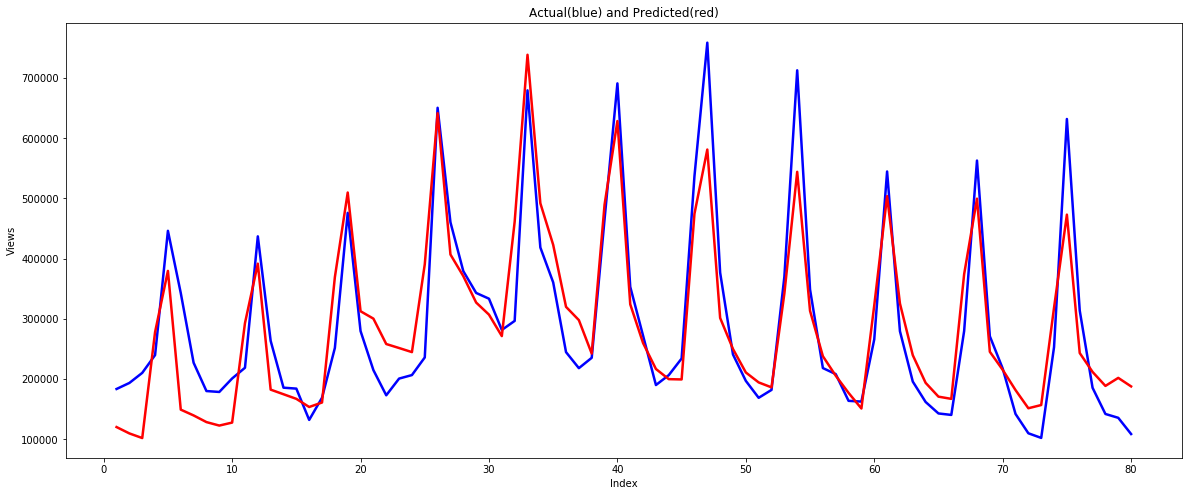

In [60]:
plt.figure(figsize = (20,8))
c = [i for i in range(1,81)]

plt.plot(c, media.Views_show, color="blue", linewidth= 2.5)
plt.plot(c, pred_views, color="red", linewidth= 2.5)

plt.title("Actual(blue) and Predicted(red)")
plt.xlabel("Index")
plt.ylabel("Views")

Text(0, 0.5, 'Error')

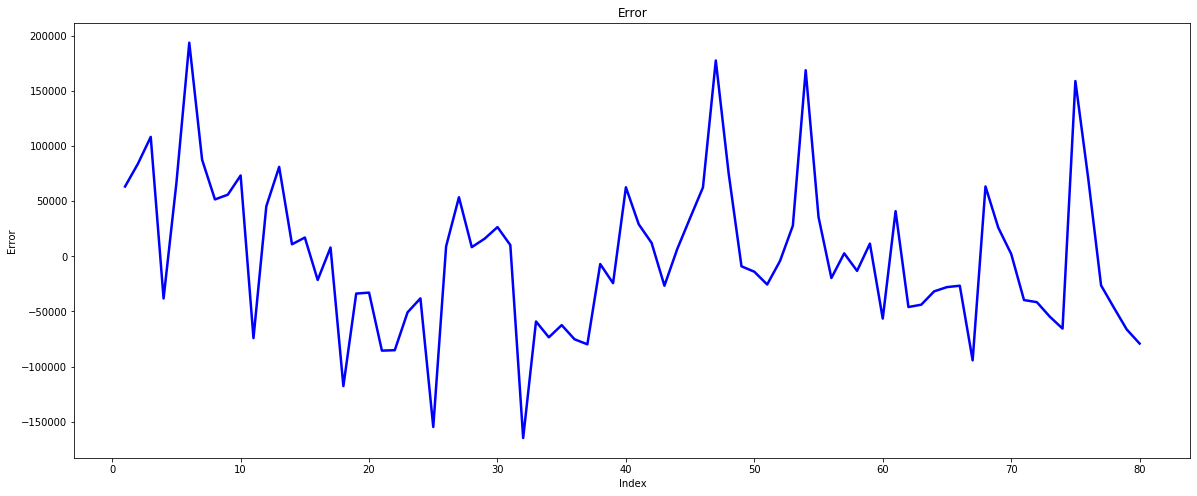

In [61]:
plt.figure(figsize=(20,8))

plt.plot(c, media.Views_show-pred_views, linewidth=2.5, color="blue")
plt.title("Error")
plt.xlabel("Index")
plt.ylabel("Error")